In [1]:
# Gerekli kütüphaneleri ekleme:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Veri setini indirip ekleme:
data = pd.read_excel("https://www.dropbox.com/s/luoopt5biecb04g/SATILIK_EV1.xlsx?dl=1")

In [3]:
# Veri setinin ilk 5 elemanını ekranda görüntüleme:
data.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [4]:
# Anlamsız veri içeren ilk sütunu silme:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
# Hedef ve öznitelik değişkenlerini tanımlama:
X = data[["Oda_Sayısı", "Net_m2", "Katı", "Yaşı"]]
y = data["Fiyat"]

In [6]:
# Veri setini rassal olarak eğitim ve test veri seti şeklinde ikiye bölümleme:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Optimum öznitelik değişkenlerinin derecesini belirleme, ve veri setleri için farklı polinom derecelerine göre 
# polinom ve etkileşim özelliklerini oluşturma:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_values = [] # Her bir polinom derecesi için oluşturulan modelin rmse değerinin tutulması için kullanılan değişken
degrees_of_polynomial = np.arange(1, 10) # 1'den 9'a kadar olan polinom derecelerini içeren değişken
min_rmse_value = 1e10 # Başlangıç RMSE değeri
min_degree_of_polynomial = 0 # Başlangıç polinom derecesinin değeri

for deg in degrees_of_polynomial:
    # Eğitim veri seti için polinom ve etkileşim parametrelerinin oluşturulması:
    polynomial_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_train_polynomial = polynomial_features.fit_transform(X_train.values) 
    # Polinom regresyon modelinin eğitimi:
    polynomial_model = LinearRegression() 
    polynomial_model.fit(X_train_polynomial, y_train)
    # Test veri seti için polinom ve etkileşim parametrelerinin oluşturulması:
    X_test_polynomial = polynomial_features.fit_transform(X_test.values)
    # Eğitim setindeki tüm veriler için polinom özellikleri oluşturarak eğitilen polinom regresyon modeli 
    # aracılığıyla test seti üzerinde bir tahmin değeri elde etme ve RMSE değerlendirme ölçütünü hesaplama:
    y_test_polynomial_predict = polynomial_model.predict(X_test_polynomial)
    polynomial_mse = mean_squared_error(y_test, y_test_polynomial_predict)
    polynomial_rmse = sqrt(mean_squared_error(y_test, y_test_polynomial_predict))
    rmse_values.append(polynomial_rmse)
    # En iyi RMSE değerini ve bu değeri veren polinom derecesi güncelleme:
    if min_rmse_value > polynomial_rmse:
        min_rmse_value = polynomial_rmse
        min_degree_of_polynomial = deg
        
# En düşük RMSE hata skorunu veren modelin polinom derecesini ekranda görüntüleme:
print("The best model has {} RMSE value and its polynomial degree is {}.".format(min_rmse_value, min_degree_of_polynomial))

The best model has 56.488437198805244 RMSE value and its polynomial degree is 2.


Text(5.2, 200, 'The best model has 56.49 RMSE value\nand its polynomial degree is 2.')

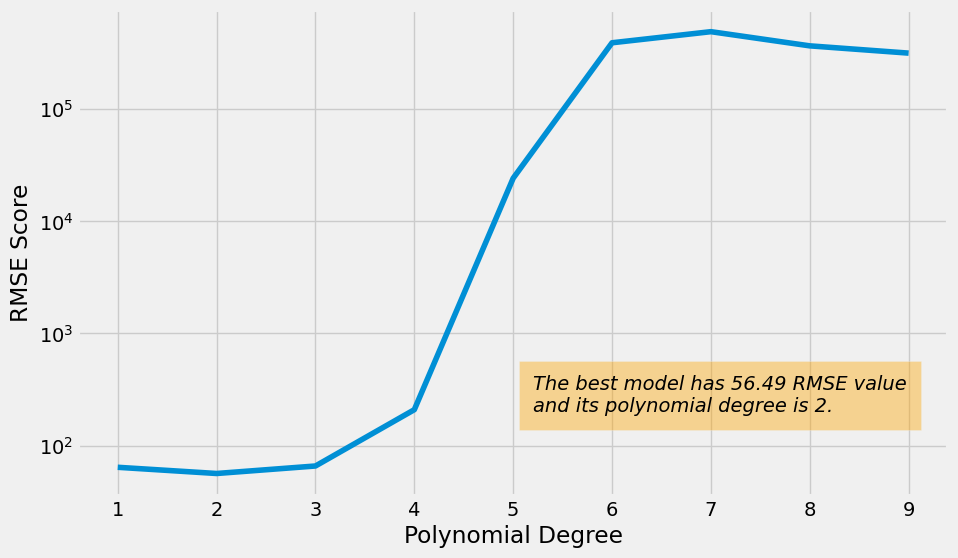

In [8]:
# Belirtilen tüm polinom dereceleri için RMSE değerlerini grafik üzerinde görüntüleme:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(degrees_of_polynomial, rmse_values)
ax.set_yscale("log")
ax.set_xlabel("Polynomial Degree")
ax.set_ylabel("RMSE Score")
plt.text(5.2, 200, ("The best model has {:.2f} RMSE value\nand its polynomial degree is {}.").format(min_rmse_value, min_degree_of_polynomial),
         style="italic", bbox={"facecolor":"orange", "alpha":0.4, "pad":10})

In [9]:
# Optimum öznitelik değişkenlerinin derecesini kullanarak veri setleri için polinom ve etkileşim özelliklerini oluşturma:
degree_of_polynomial = PolynomialFeatures(degree=2)
X_train_polynomial = degree_of_polynomial.fit_transform(X_train.values)
X_test_polynomial = degree_of_polynomial.fit_transform(X_test.values)

In [10]:
# Polinom regresyon modelinin eğitimi:
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_polynomial, y_train)

LinearRegression()

In [11]:
# Çoklu polinom regresyon modelinin R2 ölçütünü hesaplama (eğitim ve test veri setinin üzerinden tahmin):
from sklearn.metrics import r2_score
print("R2 for multiple polynomial regression model over train set:", r2_score(y_train, polynomial_model.predict(X_train_polynomial)))
print("R2 for multiple polynomial regression model over test set:", r2_score(y_test, polynomial_model.predict(X_test_polynomial)))

R2 for multiple polynomial regression model over train set: 0.8488074651060601
R2 for multiple polynomial regression model over test set: 0.7663814623333624


**Yorum**: Çoklu polinom regresyon modelinde eğitim ve test setleri arasındaki öngörü performans farkı (varyans) 0.0824 olarak elde edilmiştir. Bu varyans değeri modele biraz şüpheyle yaklaşmamıza neden olmaktadır. Polinom regresyonlarının temel sorunu eğitim setindeki hedef değişkeni daha iyi öngörüp test setindeki hedef değişkeni daha düşük performansla öngörmeleridir.

In [12]:
# Eğitim veri seti tahmini veya örneklem-içi tahmin (in-sample prediction):
# Eğitim setindeki tüm değerler için eğitilen modeli kullanarak fiyat tahmini yapma:
y_train_predicted = polynomial_model.predict(X_train_polynomial)
y_train_predicted = pd.Series(y_train_predicted, index=y_train.index)
for i, prediction in enumerate(y_train_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_train[y_train.index[i]]))

Predicted price: ₺554.88, Actual price: ₺525.00
Predicted price: ₺674.06, Actual price: ₺650.00
Predicted price: ₺573.14, Actual price: ₺550.00
Predicted price: ₺676.69, Actual price: ₺675.00
Predicted price: ₺691.73, Actual price: ₺675.00
Predicted price: ₺637.82, Actual price: ₺625.00
Predicted price: ₺563.65, Actual price: ₺575.00
Predicted price: ₺642.74, Actual price: ₺650.00
Predicted price: ₺560.85, Actual price: ₺600.00
Predicted price: ₺703.11, Actual price: ₺775.00
Predicted price: ₺907.04, Actual price: ₺800.00
Predicted price: ₺560.85, Actual price: ₺500.00
Predicted price: ₺738.98, Actual price: ₺725.00
Predicted price: ₺496.73, Actual price: ₺550.00
Predicted price: ₺533.51, Actual price: ₺625.00
Predicted price: ₺666.58, Actual price: ₺650.00
Predicted price: ₺551.91, Actual price: ₺500.00
Predicted price: ₺660.30, Actual price: ₺675.00
Predicted price: ₺634.72, Actual price: ₺625.00
Predicted price: ₺520.75, Actual price: ₺500.00
Predicted price: ₺561.49, Actual price: 

In [13]:
# Test veri seti tahmini veya örneklem-dışı tahmin (out-of-sample prediction):
# Test setindeki tüm değerler için eğitilen modeli kullanarak fiyat tahmini yapma:
y_test_predicted = polynomial_model.predict(X_test_polynomial)
for i, prediction in enumerate(y_test_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_test[y_test.index[i]]))

Predicted price: ₺725.84, Actual price: ₺775.00
Predicted price: ₺681.91, Actual price: ₺600.00
Predicted price: ₺749.01, Actual price: ₺750.00
Predicted price: ₺664.65, Actual price: ₺700.00
Predicted price: ₺643.60, Actual price: ₺625.00
Predicted price: ₺542.51, Actual price: ₺575.00
Predicted price: ₺519.79, Actual price: ₺475.00
Predicted price: ₺514.63, Actual price: ₺500.00
Predicted price: ₺637.79, Actual price: ₺650.00
Predicted price: ₺674.06, Actual price: ₺600.00
Predicted price: ₺647.14, Actual price: ₺625.00
Predicted price: ₺745.83, Actual price: ₺775.00
Predicted price: ₺516.32, Actual price: ₺525.00
Predicted price: ₺753.65, Actual price: ₺750.00
Predicted price: ₺674.06, Actual price: ₺650.00
Predicted price: ₺820.31, Actual price: ₺950.00
Predicted price: ₺753.65, Actual price: ₺775.00
Predicted price: ₺669.22, Actual price: ₺725.00
Predicted price: ₺735.77, Actual price: ₺750.00
Predicted price: ₺552.90, Actual price: ₺625.00
Predicted price: ₺568.67, Actual price: 

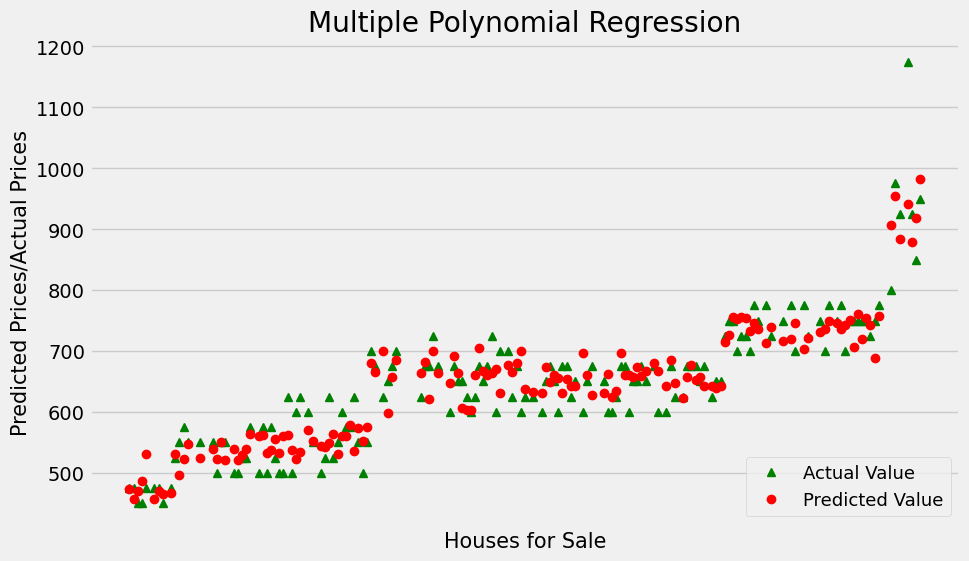

In [14]:
# Eğitim setindeki evlerin gerçek değerleri ve model ile tahmin edilmiş fiyatlarının karşılaştırılması:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 6))
plt.xticks(y_train, y_train.index.values)
plt.plot(y_train, "g^", label="Actual Value")
plt.xticks(y_train_predicted, y_train_predicted.index.values)
plt.plot(y_train_predicted, "ro", label="Predicted Value")
plt.title("Multiple Polynomial Regression")
plt.xlabel("Houses for Sale", fontsize=15)
plt.ylabel("Predicted Prices/Actual Prices", fontsize=15)
plt.legend(fontsize=13, loc="lower right")
plt.show()

**Yorum**: Buraya kadar yapmış olduğumuz tüm işlemlerde her bir özniteliğin hedef değişken ile doğrusal olmayan bir ilişkiye sahip olduğunu varsaymış olduk. Bu da daha önce bahsettiğimiz gibi modelimize şüpheyle yaklaşmamız gerektiğine neden oluyor. Çünkü tam olarak şu sorulara kesin bir cevap verememekteyiz:
1) Hedef değişkenin her bir öznitelikle ilişkisi doğrusal mı değil mi? Hangileri ile doğrusal, hangileri ile doğrusal olmayan bir ilişkiye sahiptir?
2) Eğrisel/polinomsal ilişkiye sahip olduğu özniteliklerle ilişkisi aynı polinom derecesi ile mi, farklı polinom dereceleri ile mi sağlanıyor? Bunlar için uygun polinom derecelerini nasıl tespit ederiz?

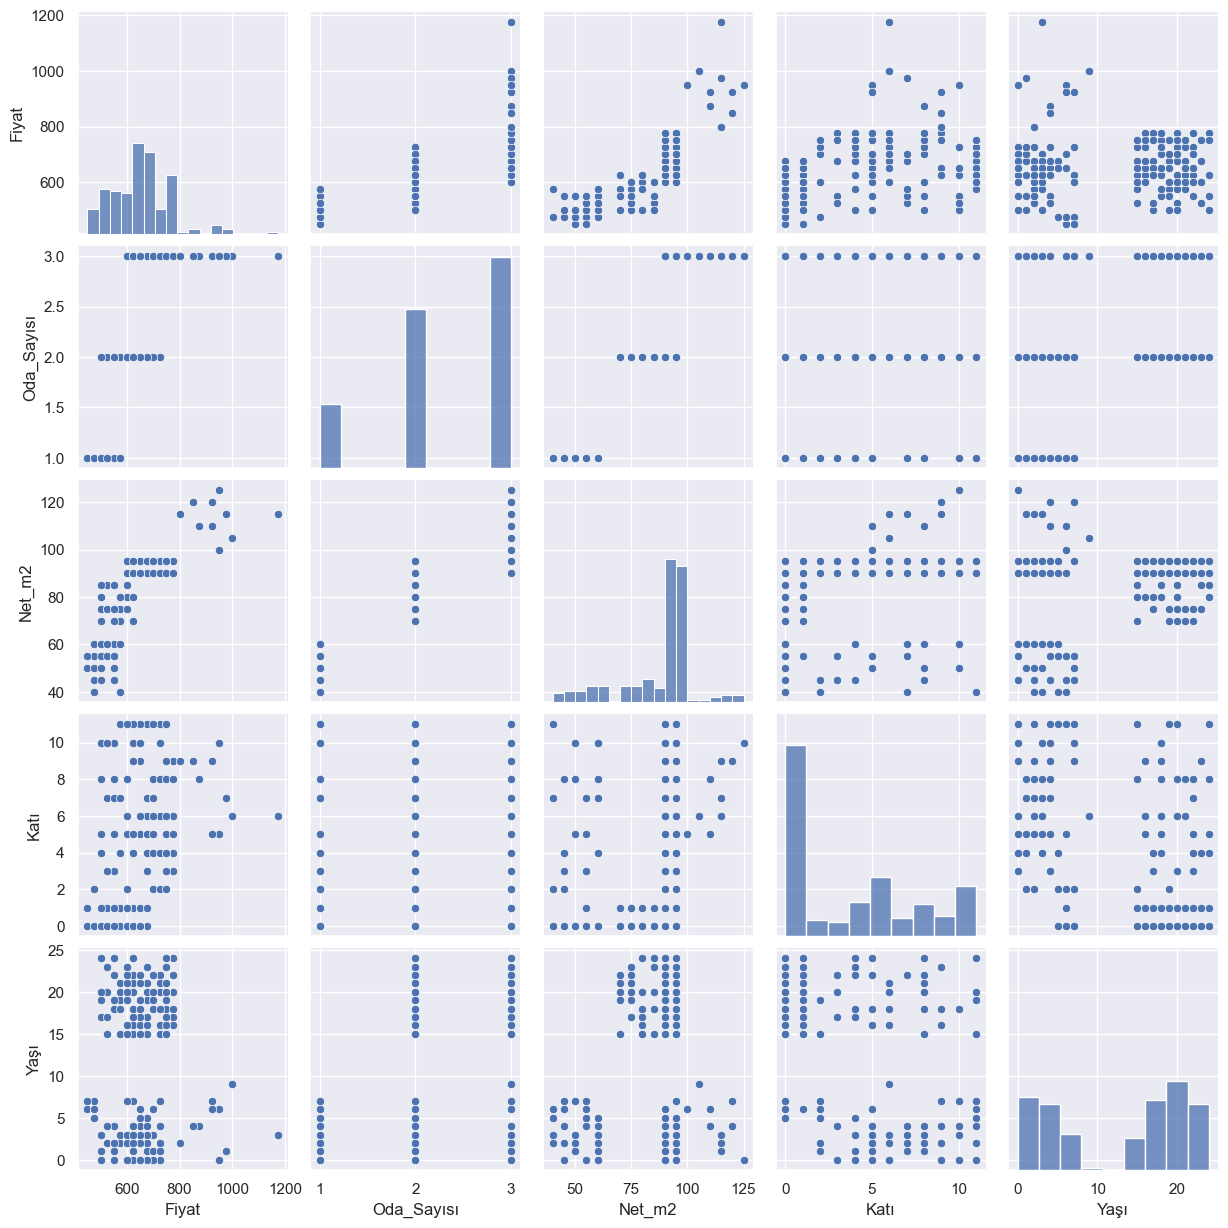

In [15]:
# Adım 1: Özniteliklerin hedef değişkenle ilişkisi gerçekten doğrusal mı? 
# Tüm değişkenlerin birbirleri ile olan ilişkilerini serpilme grafikleri ile görselleştirme:
sns.set(color_codes=True)
g = sns.pairplot(data)

**Yorum**: Ev fiyatları ile oda sayısı arasında doğrusal bir ilişki varken diğer özniteliklerle ev fiyatları arasında aynı tarz bir ilişkiden bahsedemeyiz.

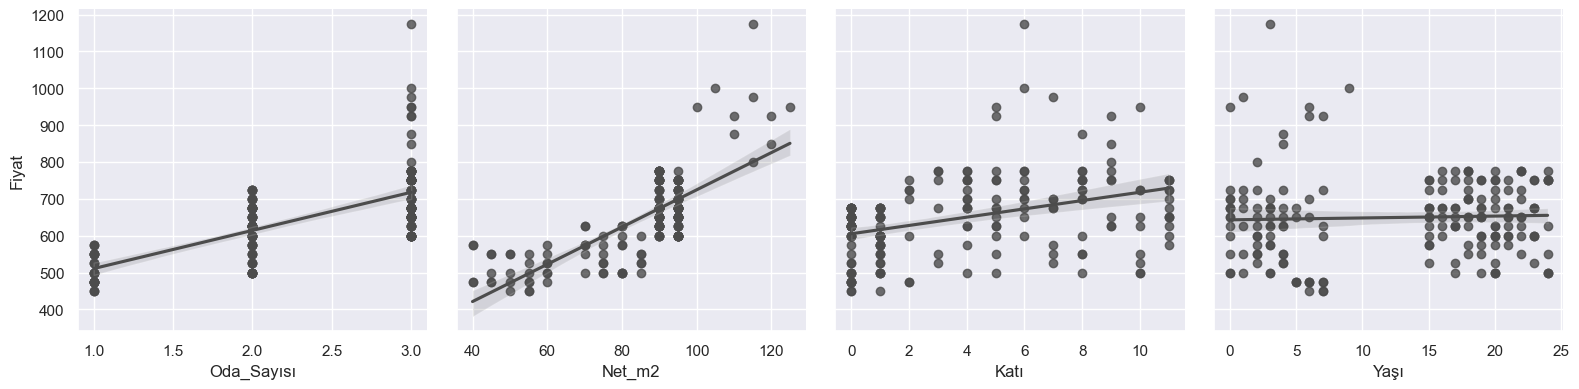

In [16]:
# Adım 2: Veri setindeki öznitelikler ile hedef değişken arasındaki ikili ilişkileri doğrusal regresyon doğrusunu çizerek detaylıca görme:
g = sns.PairGrid(data, y_vars=["Fiyat"], x_vars=["Oda_Sayısı", "Net_m2", "Katı", "Yaşı"], height=4)
g.map(sns.regplot, lowess=False, color="0.3")

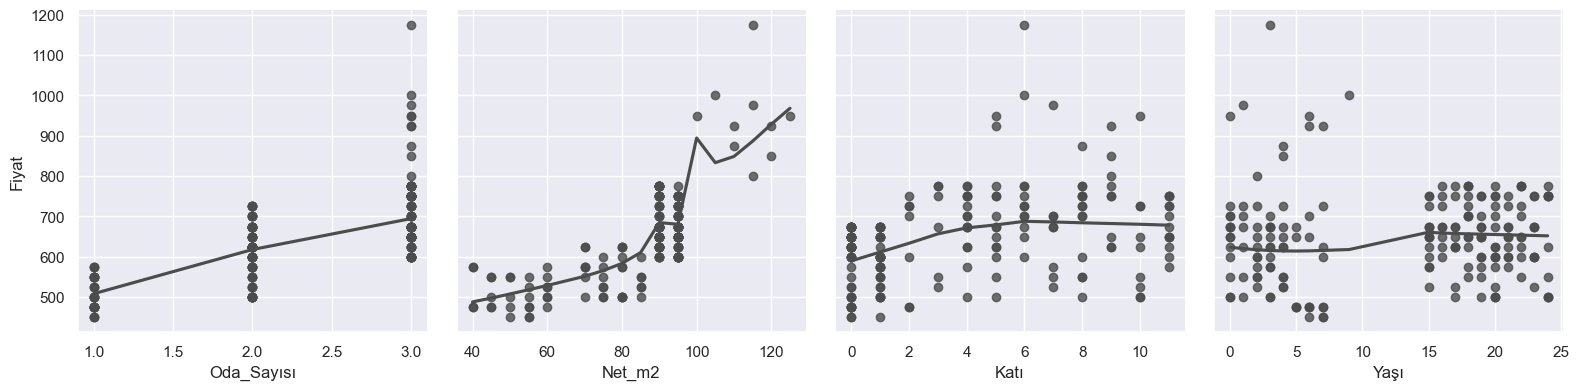

In [17]:
# Adım 3: Lowess (locally weighted scatterplot smoothing) eğrisi tekniğini kullanarak regresyon analizindeki değişkenler arasındaki
# ilişkinin yönü/trendi hakkında bilgi edinme:
g = sns.PairGrid(data, y_vars=["Fiyat"], x_vars=["Oda_Sayısı", "Net_m2", "Katı", "Yaşı"], height=4)
g.map(sns.regplot, lowess=True, color="0.3")

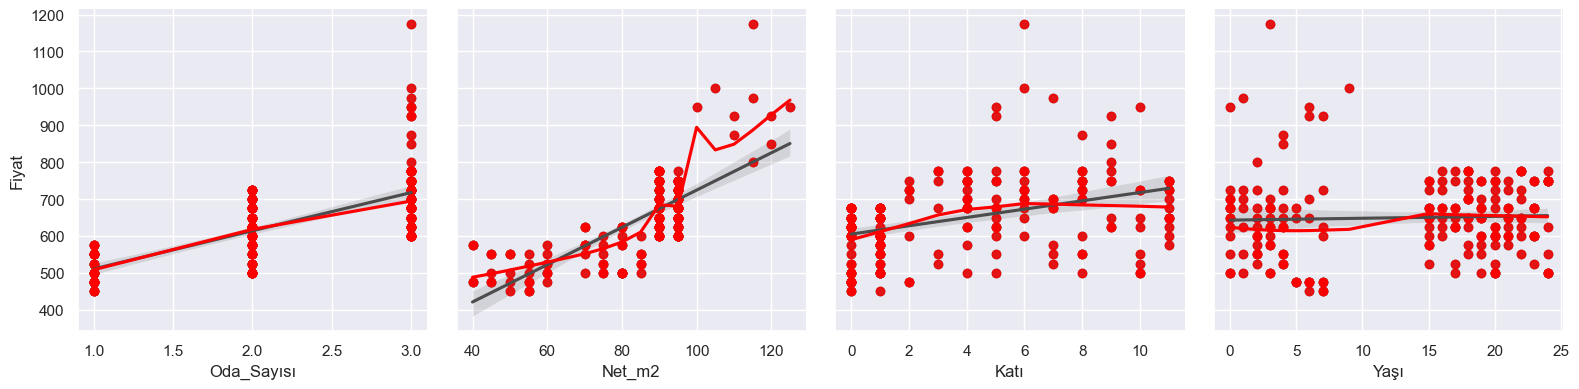

In [18]:
# Adım 4: Adım 2 ve Adım 3'de elde edilen sonuçları bir arada gösterme:
g = sns.PairGrid(data, y_vars=["Fiyat"], x_vars=["Oda_Sayısı", "Net_m2", "Katı", "Yaşı"], height=4)
g.map(sns.regplot, lowess=False, color="0.3")
g.map(sns.regplot, lowess=True, color="red")

**Yorum**: Ev fiyatları ile evin yüzölçümü ve bulunduğu kat arasındaki ilişki doğrusal görünmüyor. Ayrıca yüz ölçümü değişkeni ile evin bulunduğu kat ve binanın yaşının hedef değişken ile polinom ilişkisinin aynı dereceden olmadığı görülebiliyor. Hedef değişken oda sayısı özniteliği ile nerdeyse tam bir doğrusal ilişkiye sahiptir. Binanın yaşı ile ise nispeten doğrusal bir ilişkiye sahiptir diyebiliriz. Bu durumda polinom regresyon ile tahmin yaparken oda sayısı ve binanın yaşı değişkenlerinin polinom derecelerini almamıza gerek yoktur. Ancak evin yüzölçümü ve bulunduğu kat değişkenleri için uygun polinom derecelerini alarak dönüşüm yapmamız gerekmektedir.

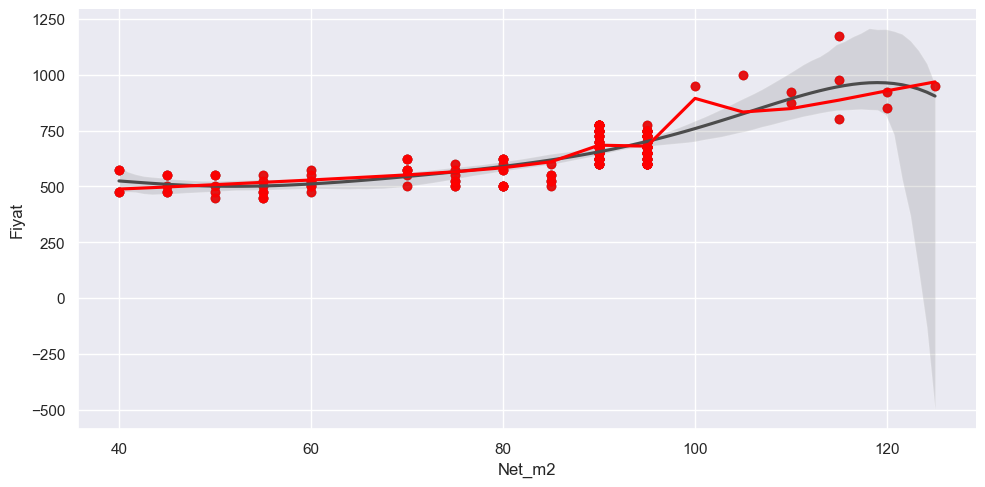

In [19]:
# Fiyat-Net Yüzölçümü ilişkisi için uygun polinom derecesini grafiksel olarak bulma:
g = sns.PairGrid(data, y_vars=["Fiyat"], x_vars=["Net_m2"], height=5, aspect=2)
g.map(sns.regplot, lowess=False, color="0.3", order=7)
g.map(sns.regplot, lowess=True, color="red")

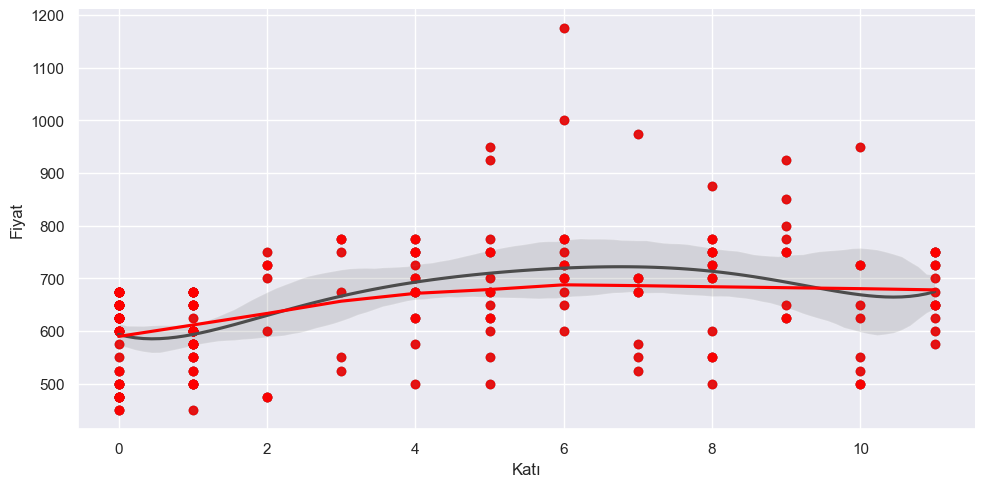

In [20]:
# Fiyat-Kat ilişkisi için uygun polinom derecesini grafiksel olarak bulma:
g = sns.PairGrid(data, y_vars=["Fiyat"], x_vars=["Katı"], height=5, aspect=2)
g.map(sns.regplot, lowess=False, color="0.3", order=6)
g.map(sns.regplot, lowess=True, color="red")

In [21]:
# Her bir öznitelik için ayrı ayrı polinom derecesinin bulunması için öznitelik değişkenlerinin hem eğitim hem de test seti için ayrılması:
# Eğitim setini yeni bir DataFrame altında birleştirip eğitim setindeki öznitelik değişkenlerini ayırma:
df_train = pd.concat([y_train, X_train], axis=1, sort=True)
X1_train = df_train["Oda_Sayısı"].values.reshape(-1, 1)
X2_train = df_train["Net_m2"].values.reshape(-1, 1)
X3_train = df_train["Katı"].values.reshape(-1, 1)
X4_train = df_train["Yaşı"].values.reshape(-1, 1)

# Test setini yeni bir DataFrame altında birleştirip test setindeki öznitelik değişkenlerini ayırma:
df_test = pd.concat([y_test, X_test], axis=1, sort=True)
X1_test = df_test["Oda_Sayısı"].values.reshape(-1, 1)
X2_test = df_test["Net_m2"].values.reshape(-1, 1)
X3_test = df_test["Katı"].values.reshape(-1, 1)
X4_test = df_test["Yaşı"].values.reshape(-1, 1)

In [22]:
# Optimum öznitelik değişkenlerinin derecesini belirleme, ve veri setleri için farklı polinom derecelerine göre 
# polinom ve etkileşim özelliklerini oluşturma fonksiyonu:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
    
def find_optimum_polynomial_degree(X_train_array, X_test_array, y_train, y_test, feature_name):
    rmse_values = [] # Her bir polinom derecesi için oluşturulan modelin rmse değerinin tutulması için kullanılan değişken
    degrees_of_polynomial = np.arange(1, 10) # 1'den 9'a kadar olan polinom derecelerini içeren değişken
    min_rmse_value = 1e10 # Başlangıç RMSE değeri
    min_degree_of_polynomial = 0 # Başlangıç polinom derecesinin değeri

    for deg in degrees_of_polynomial:
        # Eğitim veri seti için polinom ve etkileşim parametrelerinin oluşturulması:
        polynomial_features = PolynomialFeatures(degree=deg, include_bias=False)
        X_train_polynomial = polynomial_features.fit_transform(X_train_array) 
        # Polinom regresyon modelinin eğitimi:
        polynomial_model = LinearRegression() 
        polynomial_model.fit(X_train_polynomial, y_train)
        # Test veri seti için polinom ve etkileşim parametrelerinin oluşturulması:
        X_test_polynomial = polynomial_features.fit_transform(X_test_array)
        # Eğitim setindeki tüm veriler için polinom özellikleri oluşturarak eğitilen polinom regresyon modeli 
        # aracılığıyla test seti üzerinde bir tahmin değeri elde etme ve RMSE değerlendirme ölçütünü hesaplama:
        y_test_polynomial_predict = polynomial_model.predict(X_test_polynomial)
        polynomial_mse = mean_squared_error(y_test, y_test_polynomial_predict)
        polynomial_rmse = sqrt(mean_squared_error(y_test, y_test_polynomial_predict))
        rmse_values.append(polynomial_rmse)
        # En iyi RMSE değerini ve bu değeri veren polinom derecesi güncelleme:
        if min_rmse_value > polynomial_rmse:
            min_rmse_value = polynomial_rmse
            min_degree_of_polynomial = deg
        
    # En düşük RMSE hata skorunu veren modelin polinom derecesini ekranda görüntüleme:
    print("The best model has {} RMSE value and the polynomial degree for {} is {}.".format(min_rmse_value, feature_name, min_degree_of_polynomial))
    
    # Belirtilen tüm polinom dereceleri için RMSE değerlerini grafik üzerinde görüntüleme:
    fig = plt.figure(figsize=(5, 4))
    sns.lineplot(x=degrees_of_polynomial, y=rmse_values)
    plt.xlabel("Polynomial Degree")
    plt.ylabel("RMSE Score")

The best model has 119.91056545339629 RMSE value and the polynomial degree for Oda_Sayısı is 1.
The best model has 111.27043402506465 RMSE value and the polynomial degree for Net_m2 is 7.
The best model has 115.49939152651564 RMSE value and the polynomial degree for Katı is 6.
The best model has 118.77575870124342 RMSE value and the polynomial degree for Yaşı is 2.


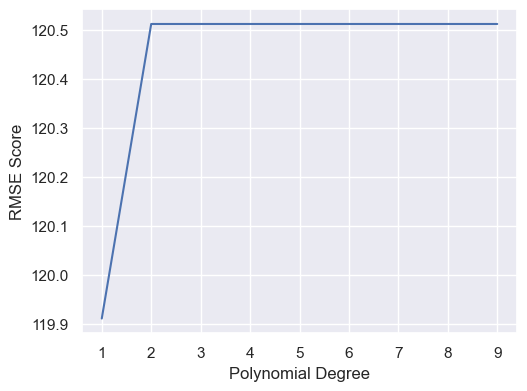

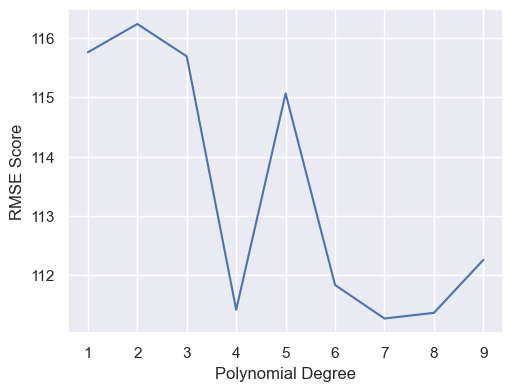

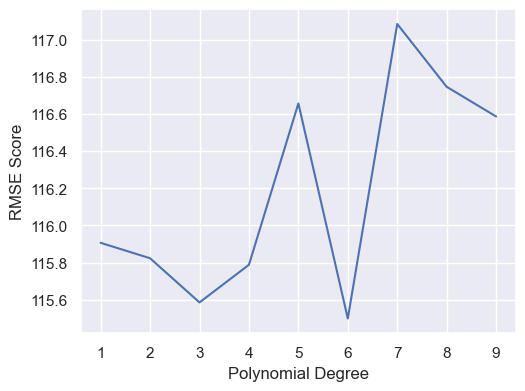

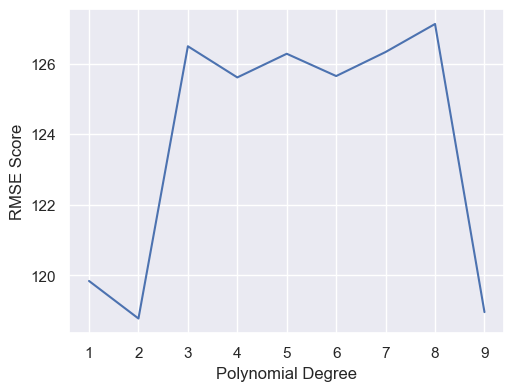

In [23]:
find_optimum_polynomial_degree(X1_train, X1_test, y_train, y_test, "Oda_Sayısı")
find_optimum_polynomial_degree(X2_train, X2_test, y_train, y_test, "Net_m2")
find_optimum_polynomial_degree(X3_train, X3_test, y_train, y_test, "Katı")
find_optimum_polynomial_degree(X4_train, X4_test, y_train, y_test, "Yaşı")

**Yorum**: Oda_Sayısı, Net_m2, Katı ve Yaşı öznitelikleri için sırasıyla polinom dereceleri 1, 7, 6 ve 2 olarak belirlenmiştir. Polinom derecesinin 1 olması doğrusal ilişki olduğu anlamına gelir. Bu durumda, Net_m2, Katı ve Yaşı öznitelikleri için polinom dönüştürmesi yapılacakken Oda_Sayısı için bu işlem yapılmayacaktır.

In [24]:
# Her bir öznitelik değişkeninin optimum derecesini kullanarak veri setleri için polinom özelliklerini sırasıyla oluşturma:
degree_of_polynomial = PolynomialFeatures(degree=1)
X1_train_polynomial = degree_of_polynomial.fit_transform(X1_train)
X1_test_polynomial = degree_of_polynomial.fit_transform(X1_test)

degree_of_polynomial = PolynomialFeatures(degree=7)
X2_train_polynomial = degree_of_polynomial.fit_transform(X2_train)
X2_test_polynomial = degree_of_polynomial.fit_transform(X2_test)

degree_of_polynomial = PolynomialFeatures(degree=6)
X3_train_polynomial = degree_of_polynomial.fit_transform(X3_train)
X3_test_polynomial = degree_of_polynomial.fit_transform(X3_test)

degree_of_polynomial = PolynomialFeatures(degree=2)
X4_train_polynomial = degree_of_polynomial.fit_transform(X4_train)
X4_test_polynomial = degree_of_polynomial.fit_transform(X4_test)

X_train_1 = np.concatenate((X1_train_polynomial, X2_train_polynomial, X3_train_polynomial, X4_train_polynomial), axis=1)
X_test_1 = np.concatenate((X1_test_polynomial, X2_test_polynomial, X3_test_polynomial, X4_test_polynomial), axis=1)

# Her bir öznitelik değişkeni için etkileşim parametrelerini sırasıyla ilgili setlere oluşturarak ekleme:
X_train_temp = pd.DataFrame()
X_test_temp = pd.DataFrame()

X_train_temp["int_1"] = X_train["Oda_Sayısı"].mul(X_train["Net_m2"])
X_train_temp["int_2"] = X_train["Oda_Sayısı"].mul(X_train["Katı"])
X_train_temp["int_3"] = X_train["Oda_Sayısı"].mul(X_train["Yaşı"])
X_train_temp["int_4"] = X_train["Net_m2"].mul(X_train["Katı"])
X_train_temp["int_5"] = X_train["Net_m2"].mul(X_train["Yaşı"])
X_train_temp["int_6"] = X_train["Katı"].mul(X_train["Yaşı"])

X_test_temp["int_1"] = X_test["Oda_Sayısı"].mul(X_test["Net_m2"])
X_test_temp["int_2"] = X_test["Oda_Sayısı"].mul(X_test["Katı"])
X_test_temp["int_3"] = X_test["Oda_Sayısı"].mul(X_test["Yaşı"])
X_test_temp["int_4"] = X_test["Net_m2"].mul(X_test["Katı"])
X_test_temp["int_5"] = X_test["Net_m2"].mul(X_test["Yaşı"])
X_test_temp["int_6"] = X_test["Katı"].mul(X_test["Yaşı"])

X_train_2 = np.array(X_train_temp[["int_1", "int_2", "int_3", "int_4", "int_5", "int_6"]])
X_test_2 = np.array(X_test_temp[["int_1", "int_2", "int_3", "int_4", "int_5", "int_6"]])

X_train_3 = np.concatenate((X_train_1, X_train_2), axis=1)
X_test_3 = np.concatenate((X_test_1, X_test_2), axis=1)

In [25]:
# Polinom regresyon modelinin eğitimi:
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_3, y_train)

LinearRegression()

In [26]:
# Çoklu polinom regresyon modelinin R2 ölçütünü hesaplama (eğitim ve test veri setinin üzerinden tahmin):
from sklearn.metrics import r2_score
print("R2 for multiple polynomial regression model over train set:", r2_score(y_train, polynomial_model.predict(X_train_3)))
print("R2 for multiple polynomial regression model over test set:", r2_score(y_test, polynomial_model.predict(X_test_3)))

R2 for multiple polynomial regression model over train set: 0.8075964609487128
R2 for multiple polynomial regression model over test set: 0.7578200785872634


In [27]:
# Eğitim veri seti tahmini veya örneklem-içi tahmin (in-sample prediction):
# Eğitim setindeki tüm değerler için eğitilen modeli kullanarak fiyat tahmini yapma:
y_train_predicted = polynomial_model.predict(X_train_3)
y_train_predicted = pd.Series(y_train_predicted, index=y_train.index)
for i, prediction in enumerate(y_train_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_train[y_train.index[i]]))

Predicted price: ₺542.19, Actual price: ₺525.00
Predicted price: ₺669.02, Actual price: ₺650.00
Predicted price: ₺532.75, Actual price: ₺550.00
Predicted price: ₺689.96, Actual price: ₺675.00
Predicted price: ₺685.02, Actual price: ₺675.00
Predicted price: ₺650.80, Actual price: ₺625.00
Predicted price: ₺558.67, Actual price: ₺575.00
Predicted price: ₺658.51, Actual price: ₺650.00
Predicted price: ₺545.78, Actual price: ₺600.00
Predicted price: ₺670.20, Actual price: ₺775.00
Predicted price: ₺869.83, Actual price: ₺800.00
Predicted price: ₺538.64, Actual price: ₺500.00
Predicted price: ₺774.82, Actual price: ₺725.00
Predicted price: ₺517.83, Actual price: ₺550.00
Predicted price: ₺565.83, Actual price: ₺625.00
Predicted price: ₺678.26, Actual price: ₺650.00
Predicted price: ₺547.32, Actual price: ₺500.00
Predicted price: ₺688.52, Actual price: ₺675.00
Predicted price: ₺657.87, Actual price: ₺625.00
Predicted price: ₺495.98, Actual price: ₺500.00
Predicted price: ₺561.78, Actual price: 

In [28]:
# Test veri seti tahmini veya örneklem-dışı tahmin (out-of-sample prediction):
# Test setindeki tüm değerler için eğitilen modeli kullanarak fiyat tahmini yapma:
y_test_predicted = polynomial_model.predict(X_test_3)
y_test_predicted = pd.Series(y_test_predicted, index=y_test.index)
for i, prediction in enumerate(y_test_predicted):
    print("Predicted price: ₺%.2f, Actual price: ₺%.2f" % (prediction, y_test[y_test.index[i]]))

Predicted price: ₺696.61, Actual price: ₺775.00
Predicted price: ₺667.18, Actual price: ₺600.00
Predicted price: ₺769.93, Actual price: ₺750.00
Predicted price: ₺663.84, Actual price: ₺700.00
Predicted price: ₺684.61, Actual price: ₺625.00
Predicted price: ₺509.24, Actual price: ₺575.00
Predicted price: ₺503.09, Actual price: ₺475.00
Predicted price: ₺505.26, Actual price: ₺500.00
Predicted price: ₺631.35, Actual price: ₺650.00
Predicted price: ₺668.30, Actual price: ₺600.00
Predicted price: ₺654.30, Actual price: ₺625.00
Predicted price: ₺724.94, Actual price: ₺775.00
Predicted price: ₺510.53, Actual price: ₺525.00
Predicted price: ₺733.34, Actual price: ₺750.00
Predicted price: ₺695.69, Actual price: ₺650.00
Predicted price: ₺817.22, Actual price: ₺950.00
Predicted price: ₺722.22, Actual price: ₺775.00
Predicted price: ₺673.26, Actual price: ₺725.00
Predicted price: ₺736.83, Actual price: ₺750.00
Predicted price: ₺504.37, Actual price: ₺625.00
Predicted price: ₺535.75, Actual price: 

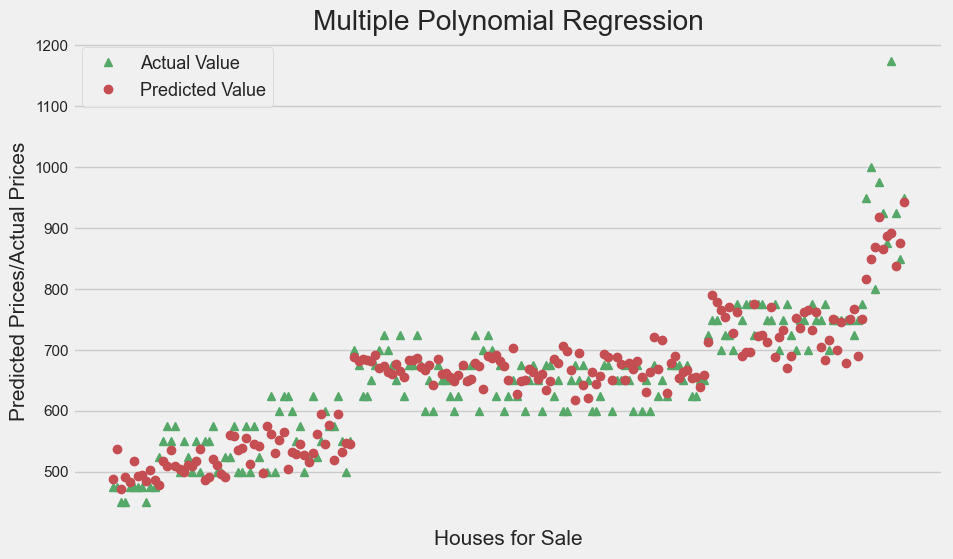

In [29]:
# Tüm veri setindeki evlerin gerçek değerleri ve model ile tahmin edilmiş fiyatlarının karşılaştırılması:
concatenated_series = pd.concat([y_train, y_test], axis=0)
concatenated_series_prediction = pd.concat([y_train_predicted, y_test_predicted], axis=0)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 6))

plt.xticks(concatenated_series, concatenated_series.index.values)
plt.plot(concatenated_series, "g^", label="Actual Value")
plt.xticks(concatenated_series_prediction, concatenated_series_prediction.index.values)
plt.plot(concatenated_series_prediction, "ro", label="Predicted Value")

plt.title("Multiple Polynomial Regression")
plt.xlabel("Houses for Sale", fontsize=15)
plt.ylabel("Predicted Prices/Actual Prices", fontsize=15)
plt.legend(fontsize=13, loc="upper left")
plt.show()